In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#### 图片读取

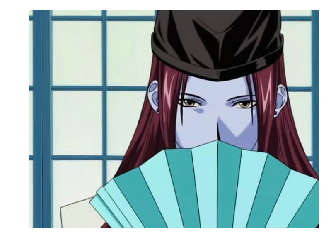

In [10]:
# 读取图片, 在jupternotebook环境下，无法使用cv2.imshow，使用matplotlib进行show
img = cv2.imread('./images/sai.jpeg')  
plt.axis('off')
plt.show()

显示的图片与原图片并不一样，这是因为opencv的颜色通道为BGR，而matplotlib的颜色通道为RGB，需要转换

#### 通道的变换

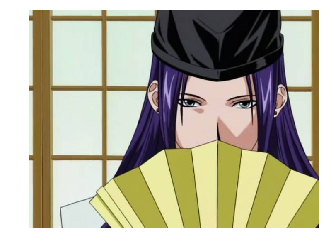

In [11]:
# 颜色通道变换
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis('off')
plt.show()

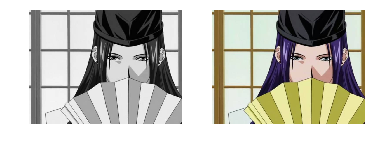

In [14]:
# imread的第二个参数为读入方式，-1为任何与透明度相关通道的会被忽视,默认以这种方式读入;0为以灰度图的形式读入图片；1为保留读取图片原有的颜色通道
gray_img = cv2.imread('./images/sai.jpeg',0)  # 灰度信息
color_img = cv2.imread('./images/sai.jpeg',1)  # BGR信息
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)  # 通道转换
plt.subplot(121)
plt.imshow(gray_img, cmap=plt.cm.gray)   # 必须设置camp参数
plt.axis('off')

plt.subplot(122)
plt.imshow(color_img)
plt.axis('off')

plt.show()

opencv的Image对象在python中的存储基于Numpy

In [15]:
print("图在python中存储的类型为",type(img))
print("读入彩图的shape为",img.shape)
print("以灰白图读入图的shape为",gray_img.shape)

图在python中存储的类型为 <class 'numpy.ndarray'>
读入图的shape为 (525, 700, 3)
以灰白图读入图的shape为 (525, 700)


因此可以考虑操作numpy的通道维，将BGR—>RGB

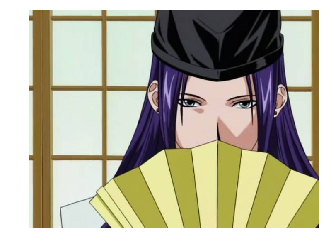

In [25]:
img3 = img.copy()
img3[:,:,[0,2]] = img3[:,:,[2,0]]
plt.imshow(img3)
plt.axis('off')
plt.show()

opencv中也提供了通道拆分的函数split

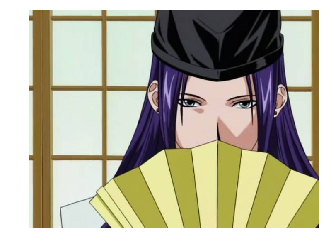

In [26]:
b,g,r=cv2.split(img)
img4 = cv2.merge([r,g,b])
plt.imshow(img4)
plt.axis('off')
plt.show()

#### opencv自带的图片show功能（在jupter环境下无法使用）

In [ ]:
img = cv2.imread("./images/sai.jpg")
cv2.namedWindow('image', cv2.WINDOW_NORMAL)#给显示的窗口命名,后面的flag默认为cv2.WINDOW_AUTOSIZE,自动调整边框
#,但是在条形图过长时,使用windownormal我们可以自行调整边框
cv2.imshow('image',img)#展示图片
cv2.waitKey(0)#等待按键按下
cv2.destroyAllWindows()#清除所有窗口

#### 存储图片

In [28]:
# 注意imwrite仍为GBR的格式，所以存储的图片并不和原图一致
cv2.imwrite('./images/sai_copy.jpg', img3)

True